In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
def make_2dcolorplot( time_taken, title = "runtime", cbar_label = 'log ( dengo runtime / grackle runtime )', vmin = -5, vmax = 0 , cmap = 'viridis'):
    fig,ax = plt.subplots(dpi = 200)
    timemap = ax.pcolor(temp_2d, den_2d, numpy.log10( (time_taken )    ) , vmin=vmin, vmax=vmax , cmap=cmap)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set
    cbar = plt.colorbar(timemap)
    cbar.set_label( cbar_label )
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Density ($cm^{-3}$)')
    ax.set_title(title)

Tdim = 32
Ddim = 32

temp_list = numpy.logspace(2,4,32)
den_list  = numpy.logspace(0,20,32)

temp_2d, den_2d = numpy.meshgrid(temp_list,den_list)
den_temp_pair2d = numpy.dstack( (temp_2d,den_2d)  )

den_temp_pair2d = ( numpy.reshape(den_temp_pair2d, (Tdim*Ddim,2) )  )

In [3]:
species_list = ["H2_1","H2_2","H_1","H_2","H_m0",
                "He_1","He_2","He_3","de","ge", "T"]

In [4]:
def get_error(name):
    error_list = []
    tol_list = [] # reltol solution
    sol_list = [] # reference solution
    
    for i in range(1024):
        j = i + 1
        with open( "error/{}_error.out".format(j) ) as f:
            for line in f.readlines():
                if name in line:
                    error, tol, sol = line.strip('\n').split(':')[1].split(';')
                    
                    error_list.append(float(error))
                    tol_list.append(float(tol))
                    sol_list.append(float(sol))
    return numpy.array(error_list), numpy.array(tol_list), numpy.array(sol_list)

('H2_1', 0)
('H2_2', 0)
('H_1', 0)
('H_2', 0)
('H_m0', 0)
('He_1', 0)
('He_2', 0)
('He_3', 3)
('de', 0)
('ge', 0)
('T', 0)


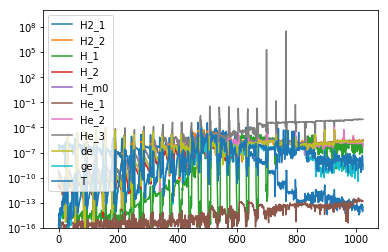

In [5]:
error_dict = {}
for sp  in species_list:
    error_dict[sp] = get_error(sp)
    plt.semilogy(error_dict[sp][0],label=sp)
    if (error_dict[sp][0] < 0.1 ).sum() <= 1024 :
        print(sp,  (error_dict[sp][0] > 0.1).sum() )

plt.ylim(1e-16,1e10)
plt.legend()

/home/kwoksun2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


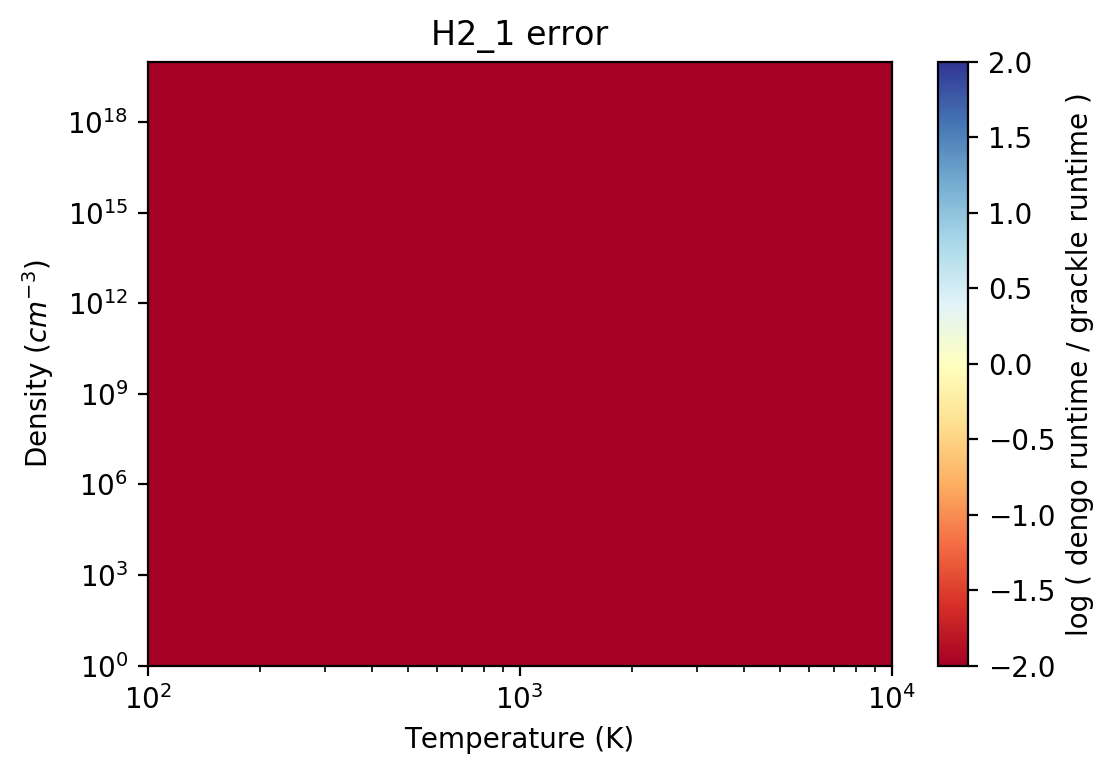

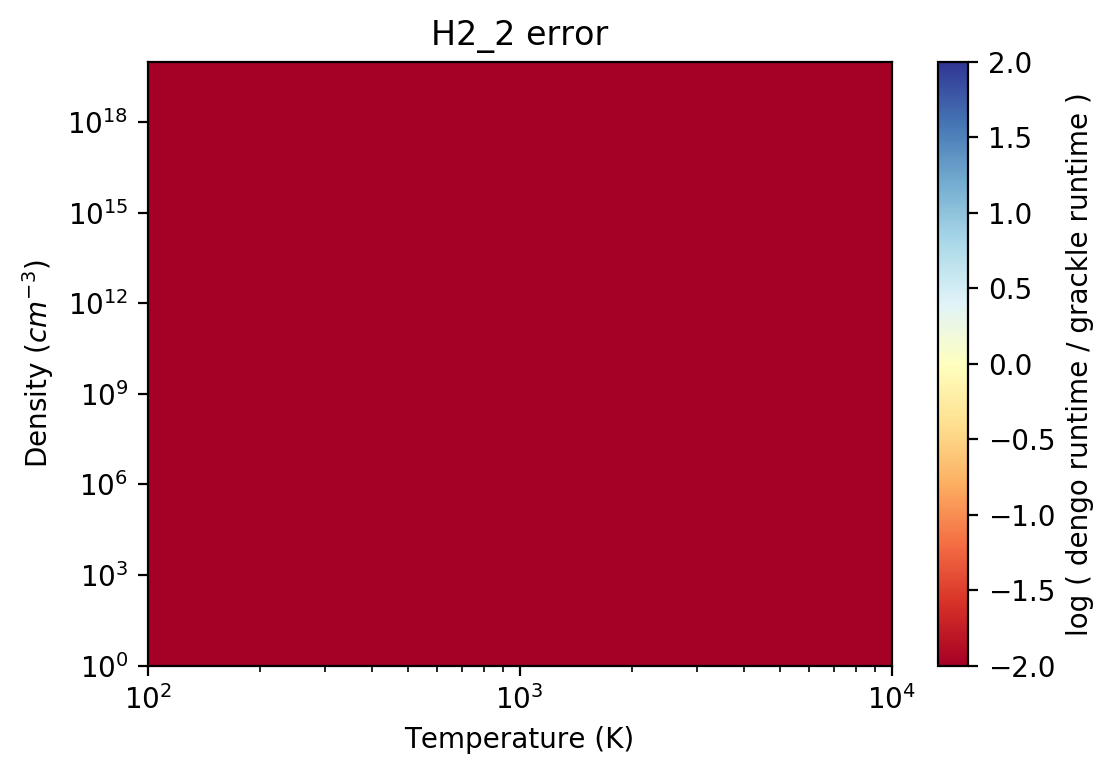

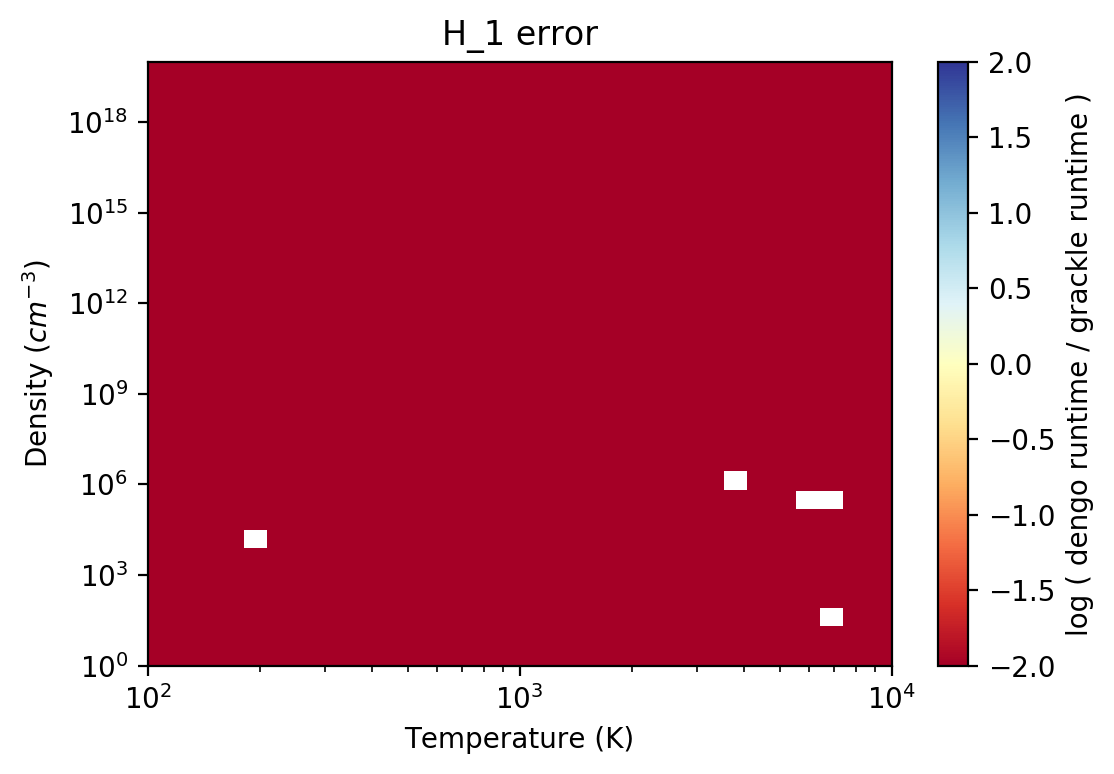

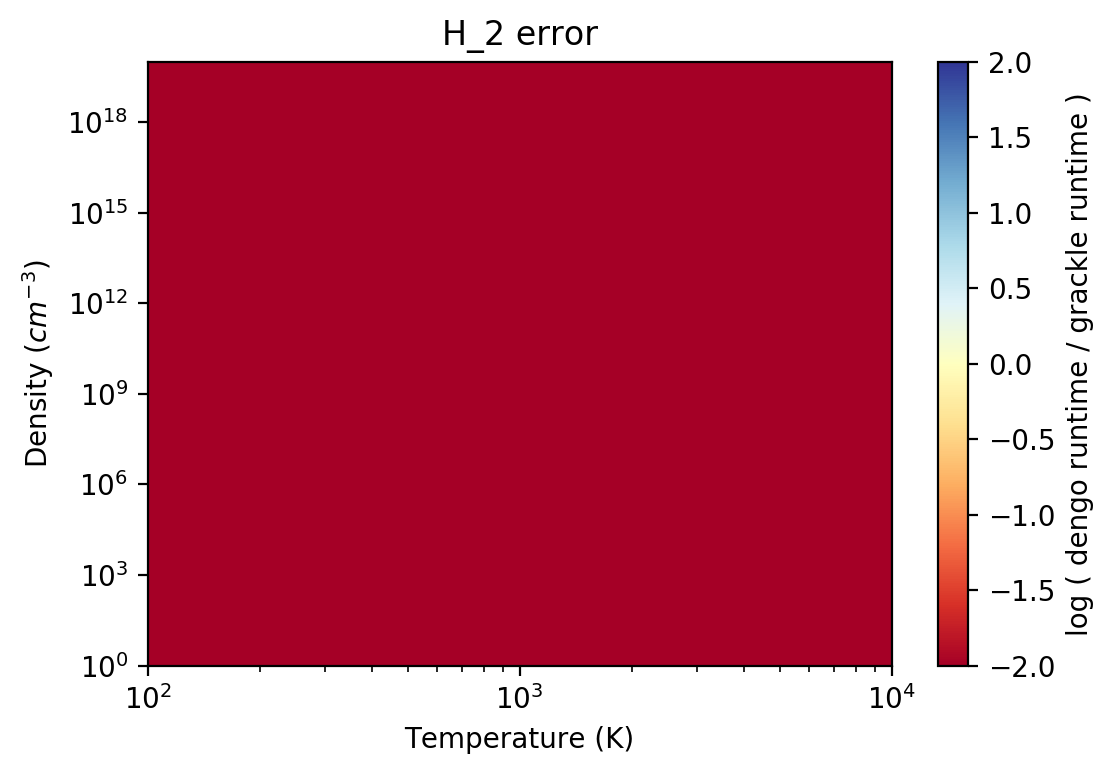

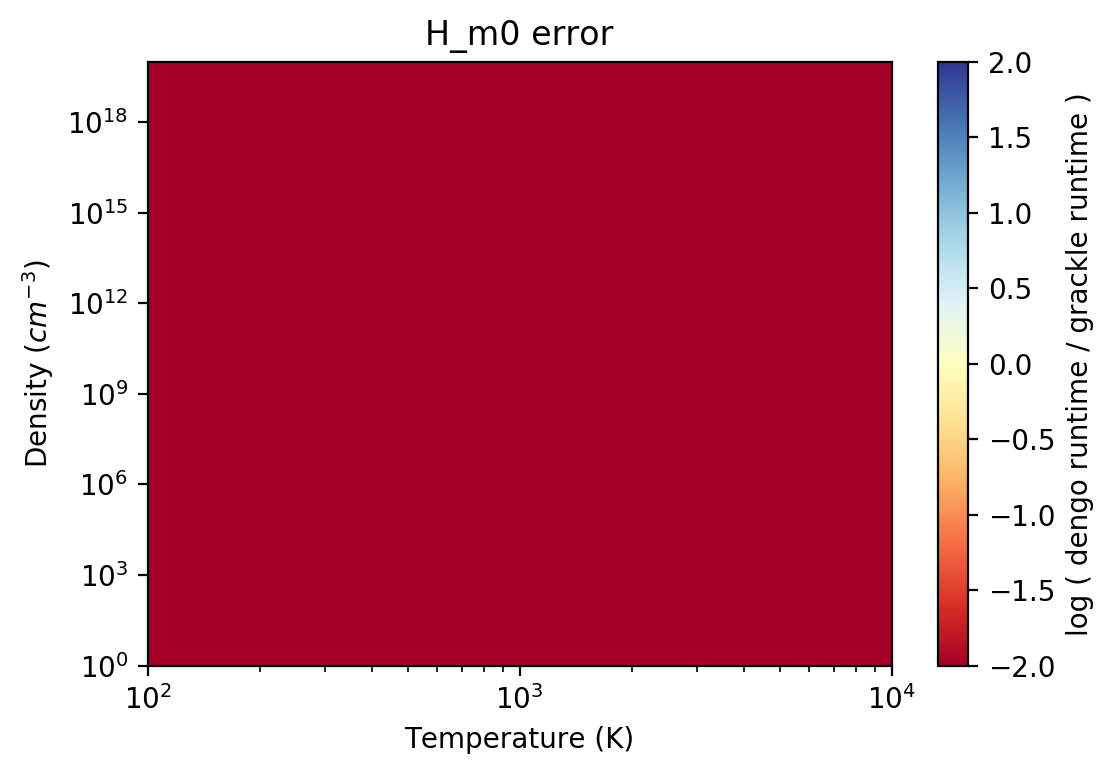

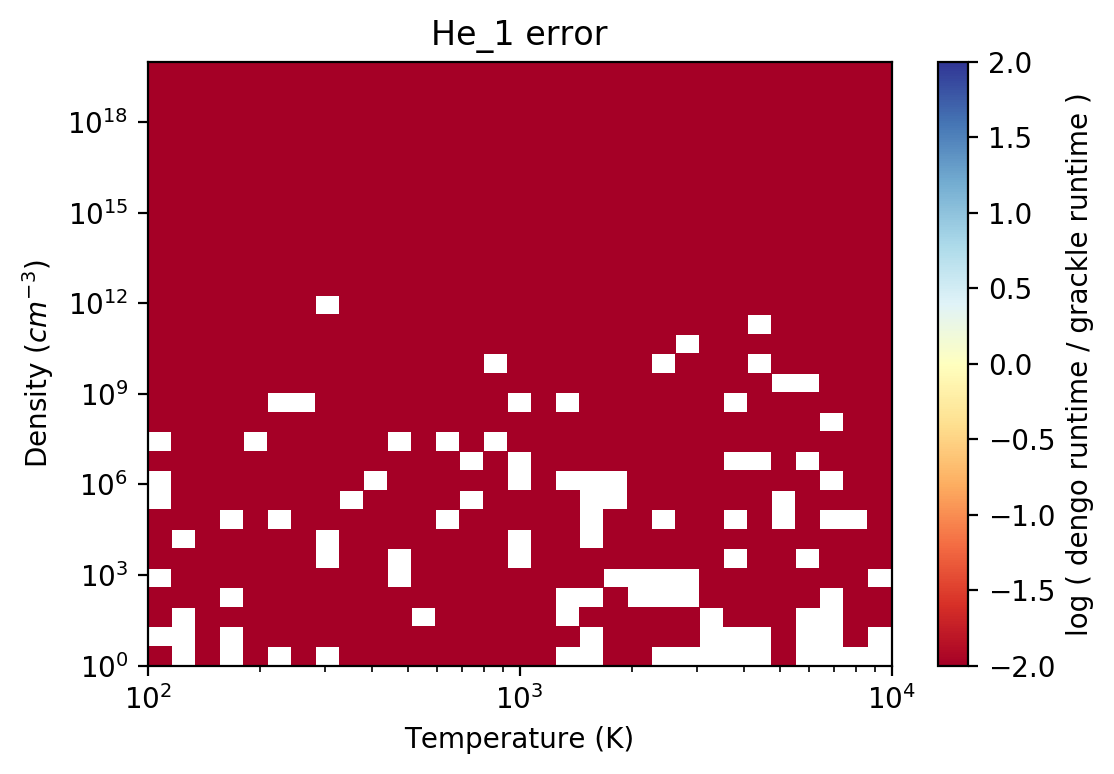

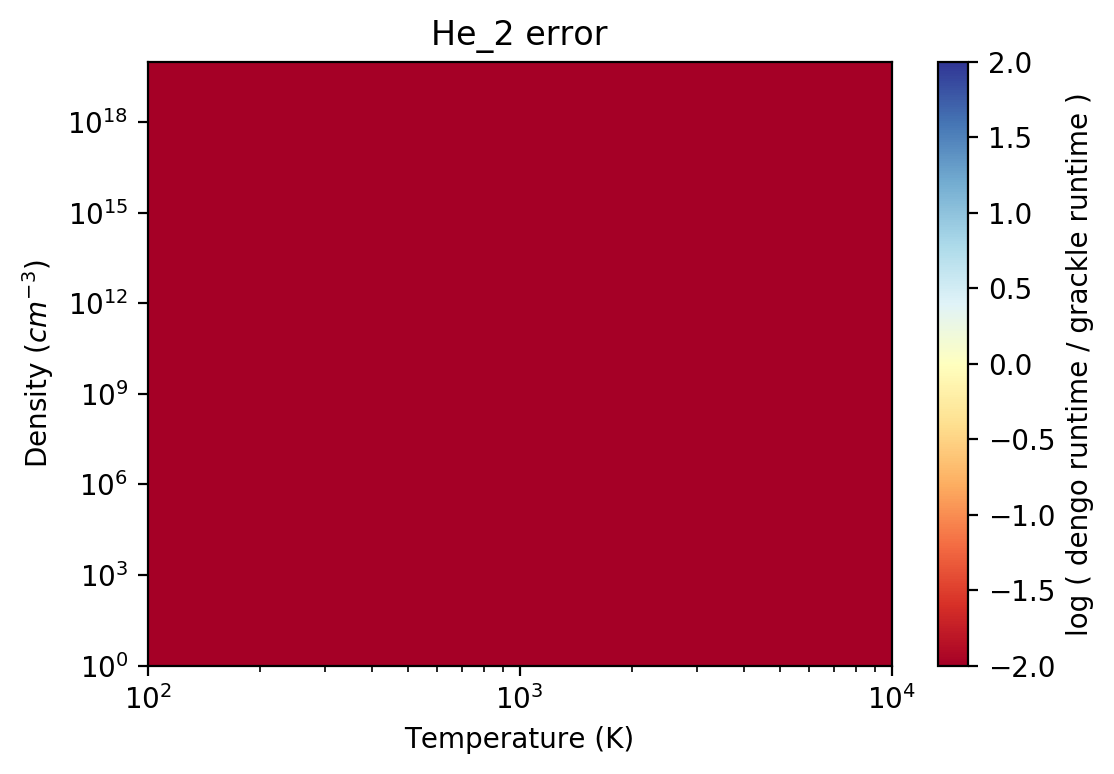

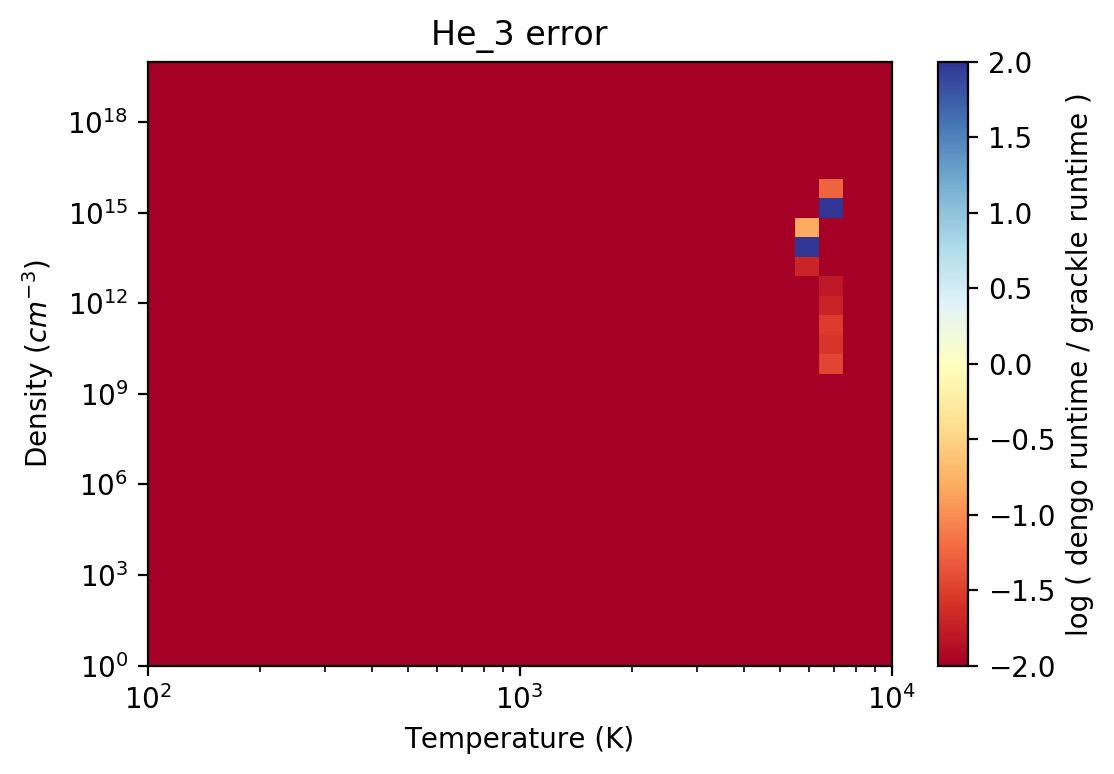

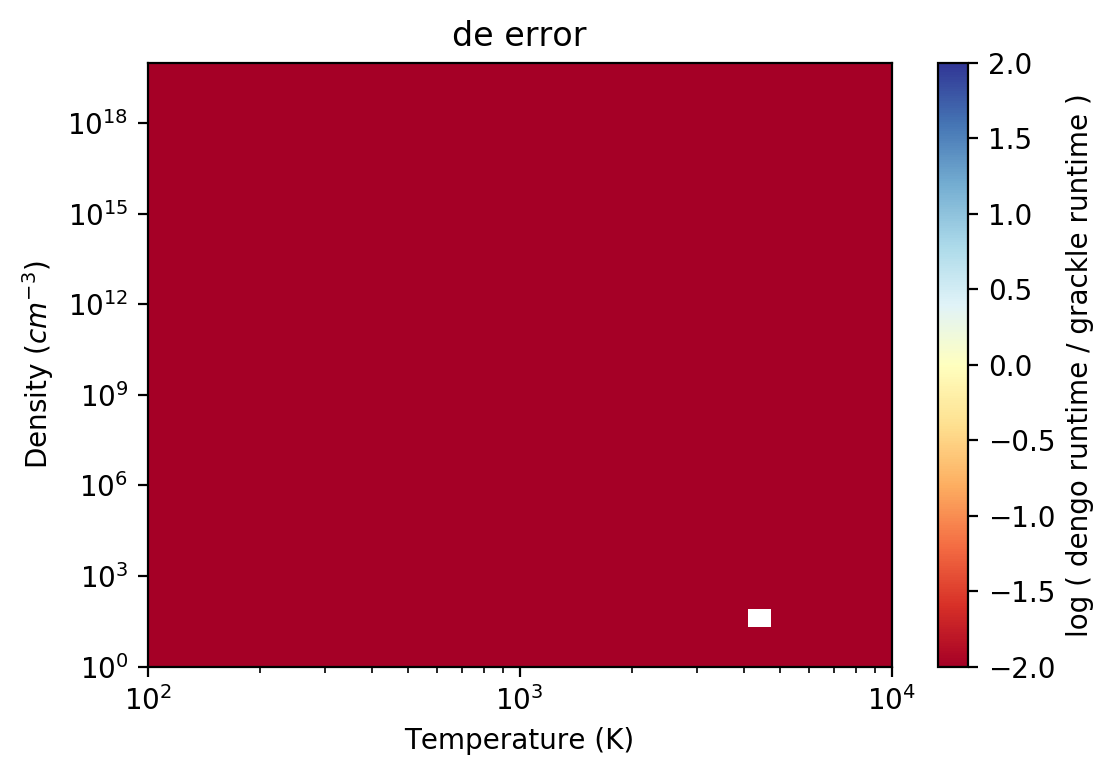

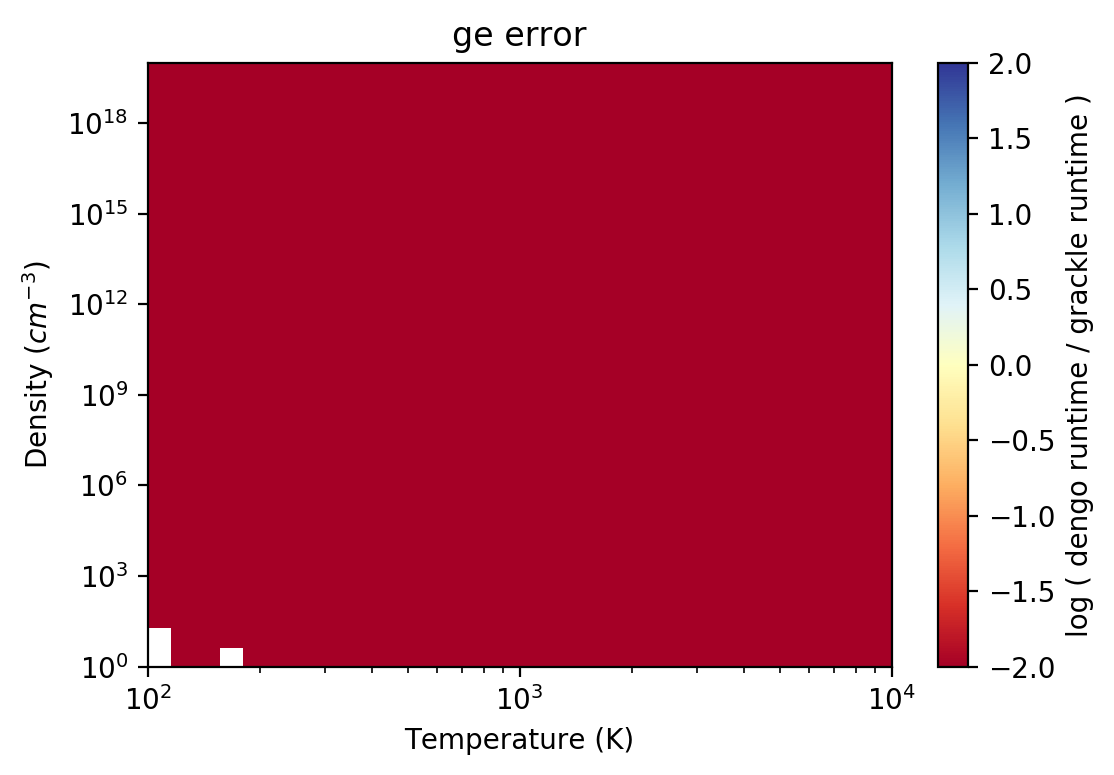

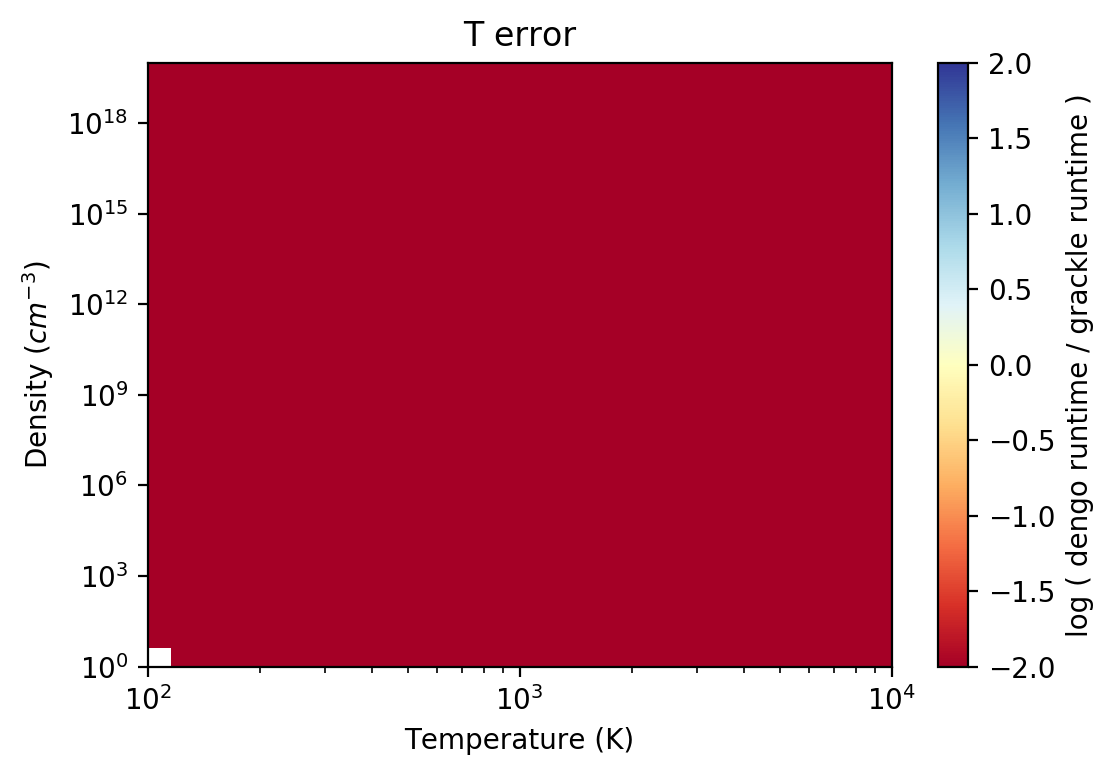

In [6]:
for sp in species_list:
    make_2dcolorplot( error_dict[sp][0].reshape((32,32)) ,  title = sp + " error", vmin=-2, vmax=2, cmap='RdYlBu' )

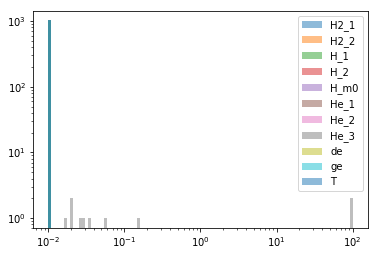

In [7]:
log_bins = numpy.logspace(-2,2, 100)
for sp in species_list:
    error_array = numpy.clip(error_dict[sp][0], 1.0e-2,1.0e2)
    plt.hist( error_array , label=sp, bins = log_bins, alpha = 0.5 )
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()